# 8.2.1 Extract the Wikipedia Movies JSON

## Find the File

In [1]:
# Import dependancies
import json
import pandas as pd
import numpy as np
import re

In [2]:
# Import the Wikipedia JSON file. 
# To make our lives easier, define a variable file_dir for the directory that's holding our data
file_dir = 'C:/Users/steve/OneDrive/Documents/GitHub/Movies-ETL'

# Now, if you want to open a file in your directory, you can use an f-string (see below) 
# instead of having to type out the whole directory every time. 
# If you move your files, you only need to update the file_dir variable.
# f'{file_dir}filename'

## Load the JSON into a List of Dictionaries

In [3]:
#open and read the wiki json file into a list of dictionaries
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
# Check the length and some records to make sure it worked and looks reasonable
len(wiki_movies_raw)

7311

In [5]:
# First 5 records
wiki_movies_raw[:5]
# Last 5 records
wiki_movies_raw[-5:]
# Middle Records
wiki_movies_raw[3600:3601]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'}]

# 8.2.2 Extract the Kaggle Data

In [6]:
# Since the Kaggle data is already in flat-file formats, 
# we'll just pull them into Pandas DataFrames directly with the following code.
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')

# Inspect the two DataFrames using the head(), tail(), and sample() methods 
# to make sure that everything seems to be loaded in correctly.

In [7]:
# Show five random rows from the dataset
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
41719,False,NaN,0,[],NaN,361340,tt0319109,en,A Brilliant Madness,NaN,...,2002-04-28,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brilliant Madness,False,0.0,0.0
9871,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,16301,tt0368711,en,End of the Century: The Story of The Ramones,Filmmaker Michael Gramaglia's years-in-the-mak...,...,2003-01-19,0.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,End of the Century: The Story of The Ramones,False,7.9,12.0
8533,False,NaN,3500000,"[{'id': 18, 'name': 'Drama'}]",NaN,27029,tt0053131,en,The Nun's Story,Gabrielle Van Der Mal gave up everything to be...,...,1959-06-18,12800000.0,149.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Her Faith Remained Strong and True in the Face...,The Nun's Story,False,7.4,46.0
41117,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 107...",NaN,410718,tt5929776,en,Before the Flood,A look at how climate change affects our envir...,...,2016-10-21,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The science is clear, the future is not.",Before the Flood,False,7.9,200.0
22436,False,NaN,0,[],http://www.greenwichmusicdoc.com/,158232,tt1941541,en,Greenwich Village: Music That Defined a Genera...,"Explores the music scene in Greenwich Village,...",...,2013-01-18,0.0,121.0,[],Released,NaN,Greenwich Village: Music That Defined a Genera...,False,7.7,3.0


# 8.3.3 Investigate the Wikipedia Data

In [8]:
# convert the wiki_movies_raw list into a df 
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [9]:
len(wiki_movies_df)

7311

In [10]:
# To see all of the column names that were imported
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

## Use List Comprehensions to Filter Data

In [11]:
# modify our JSON data by restricting it to only those entries that have a director and an IMDb link. 
# We can do this with a list comprehension.
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies)

7080

In [12]:
len(wiki_movies_raw)

7311

In [13]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [14]:
# one of the columns that stands out is "No. of episodes."
# It looks like we've got some TV shows in our data instead of movies. We'll want to get rid of those, too.
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

In [15]:
len(wiki_movies)

7076

# 8.3.4 Revisit Functions

In [16]:
# When passing mutable objects like a dict or list as parameters to a function, 
# the function can change the values inside the object.
my_list = [1,2,3]
def append_four(x):
    x.append(4)
append_four(my_list)
print(my_list)

[1, 2, 3, 4]


## Lambda Functions

In [17]:
square = lambda x: x * x
square(5)

25

# 8.3.5 Create a Function to Clean the Data, Part 1

In [18]:
# Find the movies with Arabic titles
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
7060,https://en.wikipedia.org/wiki/The_Insult_(film),2018.0,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7293,https://en.wikipedia.org/wiki/Capernaum_(film),2018.0,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Find the URL for movies with Arabic titles
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [20]:
# Counts the number of not null values for each column
wiki_movies_df.notnull().sum()

url                 7153
year                7153
imdb_link           7100
title               7134
Directed by         7103
                    ... 
Russian                1
Hebrew                 1
Revenue                1
Operating income       1
Polish                 1
Length: 193, dtype: int64

In [21]:
sorted(wiki_movies_df.columns.tolist())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

In [22]:
# Counts the number of not null values for each column one by one to see which movies have titles in other languages
wiki_movies_df['Literally'].notnull().sum()

3

In [23]:
wiki_movies_df[wiki_movies_df['Literally'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
6611,https://en.wikipedia.org/wiki/When_Marnie_Was_...,2015.0,https://www.imdb.com/title/tt3398268/,When Marnie Was There,Hiromasa Yonebayashi,Yoshiaki Nishimura,"[Masashi Andō, Keiko Niwa, Hiromasa Yonebayashi]",NaN,"[When Marnie Was There, by, Joan G. Robinson]","[Sara Takatsuki, Kasumi Arimura]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7060,https://en.wikipedia.org/wiki/The_Insult_(film),2018.0,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7289,https://en.wikipedia.org/wiki/Shoplifters,2018.0,https://www.imdb.com/title/tt8075192/,Shoplifters,Hirokazu Kore-eda,"[Matsuzaki Kaoru, Yose Akihiko, Taguchi Hijiri]",NaN,NaN,NaN,"[Lily Franky, Sakura Ando, Mayu Matsuoka, Kair...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handle the Alternative Titles

#### Step 1: Make an empty dict to hold all of the alternative titles.

In [24]:
# def clean_movie(movie):
#     movie = dict(movie) #create a non-destructive copy
#     alt_titles = {}
#     return movie

#### Step 2: Loop through a list of all alternative title keys.

In [25]:
# def clean_movie(movie):
#     movie = dict(movie) #create a non-destructive copy
#     alt_titles = {}
#     for key in ['Also known as','Arabic','Cantonese','Chinese','French',
#                 'Hangul','Hebrew','Hepburn','Japanese','Literally',
#                 'Mandarin','McCune–Reischauer','Original title','Polish',
#                 'Revised Romanization','Romanized','Russian',
#                 'Simplified','Traditional','Yiddish']:
#         
#     return movie

#### Step 2a: Check if the current key exists in the movie object.

In [26]:
# def clean_movie(movie):
#     movie = dict(movie) #create a non-destructive copy
#     alt_titles = {}
#     for key in ['Also known as','Arabic','Cantonese','Chinese','French',
#                 'Hangul','Hebrew','Hepburn','Japanese','Literally',
#                 'Mandarin','McCune–Reischauer','Original title','Polish',
#                 'Revised Romanization','Romanized','Russian',
#                 'Simplified','Traditional','Yiddish']:
#         if key in movie:
# 
#     return movie

#### Step 2b: If so, remove the key-value pair and add to the alternative titles dictionary.

In [27]:
# def clean_movie(movie):
#     movie = dict(movie) #create a non-destructive copy
#     alt_titles = {}
#     for key in ['Also known as','Arabic','Cantonese','Chinese','French',
#                 'Hangul','Hebrew','Hepburn','Japanese','Literally',
#                 'Mandarin','McCune–Reischauer','Original title','Polish',
#                 'Revised Romanization','Romanized','Russian',
#                 'Simplified','Traditional','Yiddish']:
#         if key in movie:
#             alt_titles[key] = movie[key]
#             movie.pop(key)
# 
# 
#     return movie

#### Step 3: After looping through every key, add the alternative titles dict to the movie object.

In [28]:
# def clean_movie(movie):
#     movie = dict(movie) #create a non-destructive copy
#     alt_titles = {}
#     for key in ['Also known as','Arabic','Cantonese','Chinese','French',
#                 'Hangul','Hebrew','Hepburn','Japanese','Literally',
#                 'Mandarin','McCune–Reischauer','Original title','Polish',
#                 'Revised Romanization','Romanized','Russian',
#                 'Simplified','Traditional','Yiddish']:
#         if key in movie:
#             alt_titles[key] = movie[key]
#             movie.pop(key)
#     if len(alt_titles) > 0:
#         movie['alt_titles'] = alt_titles
# 
#     return movie

In [29]:
# We can make a list of cleaned movies with a list comprehension:

# clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [30]:
# Set wiki_movies_df to be the DataFrame created from clean_movies, and print out a list of the columns.

# wiki_movies_df = pd.DataFrame(clean_movies)
# sorted(wiki_movies_df.columns.tolist())

# 8.3.6 Create a Function to Clean the Data, Part 2

In [31]:
# We need to consolidate columns with the same data into one column

# To change every instance where the key is "Directed by" to the new key "Director," 
# write the following inside clean_movie():

# change_column_name('Directed by', 'Director')


In [32]:
def clean_movie(movie):
    # Create a copy of the list of movies sent to the function
    movie = dict(movie) #create a non-destructive copy
    # Create an empty list to hold alternative tiles
    alt_titles = {}
    # Combine alternate titles into one list (Loop through the list of movies one key at a time)
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        # if the key matches the key in the list of movie then
        if key in movie:
            # add the alternate name from the movie list to the alt_titles list
            alt_titles[key] = movie[key]
            # remove the record since it's a duplicate
            movie.pop(key)
    # if the list of alrernate titles is greater then zero
    if len(alt_titles) > 0:
        #       
        movie['alt_titles'] = alt_titles
        
    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    return movie

In [33]:
# Now we can rerun our list comprehension to clean wiki_movies and recreate wiki_movies_df.
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

# 8.3.7 Remove Duplicate Rows

In [34]:
# Extract the imdb_id from the imdb_link and assign it to a new column for imdb_id
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
# Remove duplicate rows containing the same imdb_id
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


## Remove Mostly Null Columns

In [35]:
# see how many null values are in each column
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [36]:
# which columns have less then 90% null values
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [37]:
# Get rid of columns with more then 90% nulls
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [38]:
len(wiki_movies_df)

7033

# 8.3.8 Make a Plan to Convert and Parse the Data

In [39]:
# identify which columns need to be converted
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [40]:
# first we'll make a data series that drops missing values with the following:
box_office = wiki_movies_df['Box office'].dropna()

In [41]:
len(box_office)

5485

In [42]:
wiki_movies_df.isnull().sum()

url                         0
year                        0
imdb_link                   0
title                       1
Based on                 4852
Starring                  184
Cinematography            691
Release date               32
Running time              139
Country                   236
Language                  244
Budget                   2295
Box office               1548
Director                    0
Distributor               357
Editor(s)                 548
Composer(s)               518
Producer(s)               202
Production company(s)    1678
Writer(s)                 199
imdb_id                     0
dtype: int64

In [43]:
#make a is_not_a_string() function:
def is_not_a_string(x):
    return type(x) != str

In [44]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [45]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [46]:
#There is a join() string method that concatenates list items into one string
some_list = ['One','Two','Three']
'Mississippi'.join(some_list)

'OneMississippiTwoMississippiThree'

In [47]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [48]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [49]:
import re

# 8.3.10 Parse the Box Office Data

## Create the First Form

In [50]:
# "$123.4 million" (or billion)
# the first form, our pattern match string will include six elements in the following order:

#A dollar sign
#An arbitrary (but non-zero) number of digits
#An optional decimal point
#An arbitrary (but possibly zero) number of more digits
#A space (maybe more than one)
#The word "million" or "billion"

#### Step 1: Start with a dollar sign.

In [51]:
# the regular expression that matches a dollar sign

# "\$"

#### Step 2: Add an arbitrary (but non-zero) number of digits.

In [52]:
# add the \d character to specify digits only, and the + modifier to capture one or more digits

# "\$\d+"

#### Step 3: Add an optional decimal point.

In [53]:
# the decimal point is a special character, so it needs to be escaped with a backslash
# the decimal point is optional, add a question mark modifier after it

# "\$\d+\.?"

#### Step 4: Add an arbitrary (but possibly zero) number of more digits.

In [54]:
# use the \d character to specify digits only, 
# but now with the * modifier because there may be no more digits after the decimal point

# "\$\d+\.?\d*"

#### Step 6: Add the word "million" or "billion."

In [55]:
# "million" and "billion" only differ by one letter, we can match it with a character set for the first letter

# "\$\d+\.?\d*\s*[mb]illion"

In [56]:
# Create a variable form_one and set it equal to the finished regular expression string. 
# Because we need the escape characters to remain, we need to preface the string with an r.

form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [57]:
# count up how many box office values match our first form
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

## Create the Second Form

In [58]:
# we'll match the numbers of our second form, "$123,456,789." 
# In words, our pattern match string will include the following elements:

#A dollar sign
#A group of one to three digits
#At least one group starting with a comma and followed by exactly three digits

#### Step 1: Start with a dollar sign.

In [59]:
# Once again, we need to escape the dollar sign for it to match. 
# Our regular expression string starts like this: 

# "\$".

#### Step 2: Add a group of one to three digits.

In [60]:
# use the \d character for digits, but this time, 
# we'll modify it with curly brackets to only match one through three repetitions. 
# Our regular expression string now appears as 

# "\$\d{1,3}".

#### Step 3: Match at least one group starting with a comma and followed by exactly three digits.

In [61]:
# To match a comma and exactly three digits, we'll use the string

# ",\d{3}"

# To match any repetition of that group, we'll put it inside parentheses, 
# and then put a plus sign after the parentheses: 

# "(,\d{3})+"

# We'll add one more modification to specify that this is a non-capturing group by inserting a question mark
# and colon after the opening parenthesis: 

# "(?:,\d{3})+" 

# The use of a non-capturing group isn’t strictly necessary here, 
# but it eliminates an unwanted warning message in Jupyter Notebook. 
# Our finished regular expression string now appears as 

# "\$\d{1,3}(?:,\d{3})+"

In [62]:
# Create another variable form_two and set it equal to the finished regular expression string
# make it a raw string so Python keeps the escaped characters.

form_two = r'\$\d{1,3}(?:,\d{3})+'

In [63]:
# count up the number of box office values that match this pattern
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

## Compare Values in Forms

In [64]:
# Most of the box office values are described by either form. 
# Now we want to see which values aren't described by either. 
# To be safe, we should see if any box office values are described by both.

# create two Boolean Series called matches_form_one and matches_form_two, 
# and then select the box office values that don't match either

matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [65]:
# this will throw an error!
box_office[(not matches_form_one) and (not matches_form_two)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [66]:
# This is the correct way
# ~ is not
# & is and

box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

## Fix Pattern Matches

In [67]:
# Some values have spaces in between the dollar sign and the number.
# add \s* after the dollar signs

form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

In [68]:
# Some values use a period as a thousands separator, not a comma.
# allow for either a comma or period as a thousands separator

form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

# add a negative lookahead group that looks ahead for "million" or "billion" after the number 
# and rejects the match if it finds those strings

form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [69]:
# Some values are given as a range.
# search for any string that starts with a dollar sign and ends with a hyphen, 
# and then replace it with just a dollar sign using the replace() method

# The first argument in the replace() method is the substring that will be replaced, 
# and the second argument in the replace() method is the string to replace it with

# put all three types of dashes into a character set in our replace regular expression

box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [70]:
# "Million" is sometimes misspelled as "millon."
# make the second "i" optional in our match string with a question mark as follows:

form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

## Extract and Convert the Box Office Values

In [71]:
# The f-string f'{form_one}|{form_two}' will create a regular expression that matches either 
# form_one or form_two, so we just need to put the whole thing in parentheses to create a capture group.
# Our final string will be f'({form_one}|{form_two})', and the full line of code to extract the data follows:

box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [72]:
# need a function to turn the extracted values into a numeric value
# start by making a skeleton function with comments explaining each step, and then fill in the steps with actual code.

#def parse_dollars(s):
    # if s is not a string, return NaN

    # if input is of the form $###.# million

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN

In [ ]:
# use re.match(pattern, string) to see if our string matches a pattern. 
# To start, we'll make some small alterations to the forms we defined, 
# splitting the million and billion matches from form one.

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN
    else:
        return np.nan

In [ ]:
# Next, we'll use re.sub(pattern, replacement_string, string) to remove dollar signs, spaces, commas, and letters,
# if necessary.

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float

        # return value

    # otherwise, return NaN
    else:
        return np.nan

In [73]:
# Finally, convert all the strings to floats, multiply by the right amount, and return the value.

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [74]:
# extract the values from box_office using str.extract. 
# Then we'll apply parse_dollars to the first column in the DataFrame returned by str.extract, 
# which in code looks like the following:

wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [75]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [76]:
# Drop the old column "Box Office"

wiki_movies_df.drop('Box office', axis=1, inplace=True)

# 8.3.11 Parse Budget Data

In [77]:
# Create a budget variable

budget = wiki_movies_df['Budget'].dropna()

In [78]:
# Convert any lists to strings:

budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [79]:
# remove any values between a dollar sign and a hyphen (for budgets given in ranges):

budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [80]:
# Use the same pattern matches that you created to parse the box office data, 
# and apply them without modifications to the budget data. Then, look at what's left.

matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [81]:
# Remove the citation references with the following:

budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

C:\Users\steve\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [82]:
# parse the budget values. 
# We can copy the line of code we used to parse the box office values, changing "box_office" to "budget":

wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [83]:
# drop the original Budget column

wiki_movies_df.drop('Budget', axis=1, inplace=True)

## Parse Release Date

In [84]:
# First, make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:

release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [85]:
# The forms we'll be parsing are:

#Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
#Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
#Full month name, four-digit year (i.e., January 2000)
#Four-digit year

date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [86]:
# And then we can extract the dates with:

release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"November 8, 2018"
7074,"August 31, 2018"


In [87]:
# Instead of creating our own function to parse the dates, we'll use the built-in to_datetime() method in Pandas. 
# Since there are different date formats, set the infer_datetime_format option to True. 
# The date formats we've targeted are among those that the to_datetime() function can recognize, 
# which explains the infer_datetime_format=True argument below.

wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

## Parse Running Time

In [88]:
# First, make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:

running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [89]:
# It looks like most of the entries just look like "100 minutes." Let's see how many running times look exactly like that 
# by using string boundaries.

running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [90]:
# Let's get a sense of what the other entries look like.

running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [91]:
# Let's make this more general by only marking the beginning of the string, 
# and accepting other abbreviations of "minutes" by only searching up to the letter "m."

running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [92]:
# the remaining are 

running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [93]:
# We can match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:

#Start with one or more digits.
#Have an optional space after the digit and before the letter "h."
#Capture all the possible abbreviations of "hour(s)." To do this, we'll make every letter in "hours" optional except the "h."
#Have an optional space after the "hours" marker.
#Have an optional number of digits for minutes.
#As a pattern, this looks like "\d+\s*ho?u?r?s?\s*\d*".

In [94]:
# With our new pattern, it's time to extract values. We only want to extract digits, 
# and we want to allow for both possible patterns. Therefore, we'll add capture groups around the \d instances 
# as well as add an alternating character. Our code will look like the following.

running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [95]:
# Unfortunately, this new DataFrame is all strings, we'll need to convert them to numeric values. 
# Because we may have captured empty strings, 
# we'll use the to_numeric() method and set the errors argument to 'coerce'. 
# Coercing the errors will turn the empty strings into Not a Number (NaN), 
# then we can use fillna() to change all the NaNs to zeros.

running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [96]:
# Now we can apply a function that will convert the hour capture groups and minute capture groups to minutes 
# if the pure minutes capture group is zero, and save the output to wiki_movies_df:

wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [97]:
# Finally, we can drop Running time from the dataset with the following code:

wiki_movies_df.drop('Running time', axis=1, inplace=True)

# 8.3.12 Clean the Kaggle Data

## Initial Look at the Movie Metadata

In [98]:
# check is that all of the columns came in as the correct data types
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [99]:
# convert the data types for each of the six columns that need to be converted.
# Before we convert the "adult" and "video" columns, we want to check that all the values are either True or False.

kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

#### Remove Bad Data

In [100]:
# To remove the bad data, use the following:

kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# The following code will keep rows where the adult column is False, and then drop the adult column.

kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [102]:
# Next, we'll look at the values of the video column:

kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

#### Convert Data Types

In [103]:
# To convert, use the following code:

kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [104]:
# The above code creates the Boolean column we want. We just need to assign it back to video:

kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [105]:
# For the numeric columns, we can just use the to_numeric() method from Pandas. 
# We'll make sure the errors= argument is set to 'raise', 
# so we'll know if there's any data that can't be converted to numbers.

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [106]:
# Finally, we need to convert release_date to datetime. 
# Luckily, Pandas has a built-in function for that as well: to_datetime().
# Since release_date is in a standard format, to_datetime() will convert it without any fuss.

kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

## Reasonability Checks on Ratings Data

In [107]:
# Lastly, we'll take a look at the ratings data. We'll use the info() method on the DataFrame. 
# Since the ratings dataset has so many rows, we need to set the null_counts option to True.

ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [108]:
# For our own analysis, we won't be using the timestamp column; 
# however, we will be storing the rating data as its own table in SQL, 
# so we'll need to convert it to a datetime data type

# We'll specify in to_datetime() that the origin is 'unix' and the time unit is seconds.

pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [109]:
# Since the output looks reasonable, assign it to the timestamp column.

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

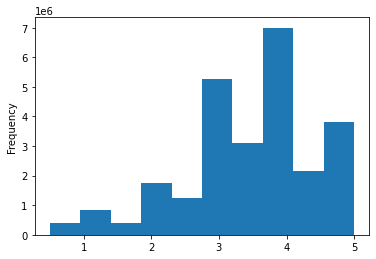

In [110]:
# Finally, we'll look at the statistics of the actual ratings and see if there are any glaring errors. 
# A quick, easy way to do this is to look at a histogram of the rating distributions, 
# and then use the describe() method to print out some stats on central tendency and spread.

pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

# 8.4.1 Merge Wikipedia and Kaggle Metadata